<a href="https://colab.research.google.com/github/AkashKoley012/Deep-Learning-Projects/blob/main/Mnist%20Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load MNIST dataset

In [9]:
import torchvision
import torchvision.transforms as transforms

# Load MNIST dataset & (PIL Image -> pytorch tensor) & (Normalize in [-1, 1])
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='', train=False, transform=transform, download=True)

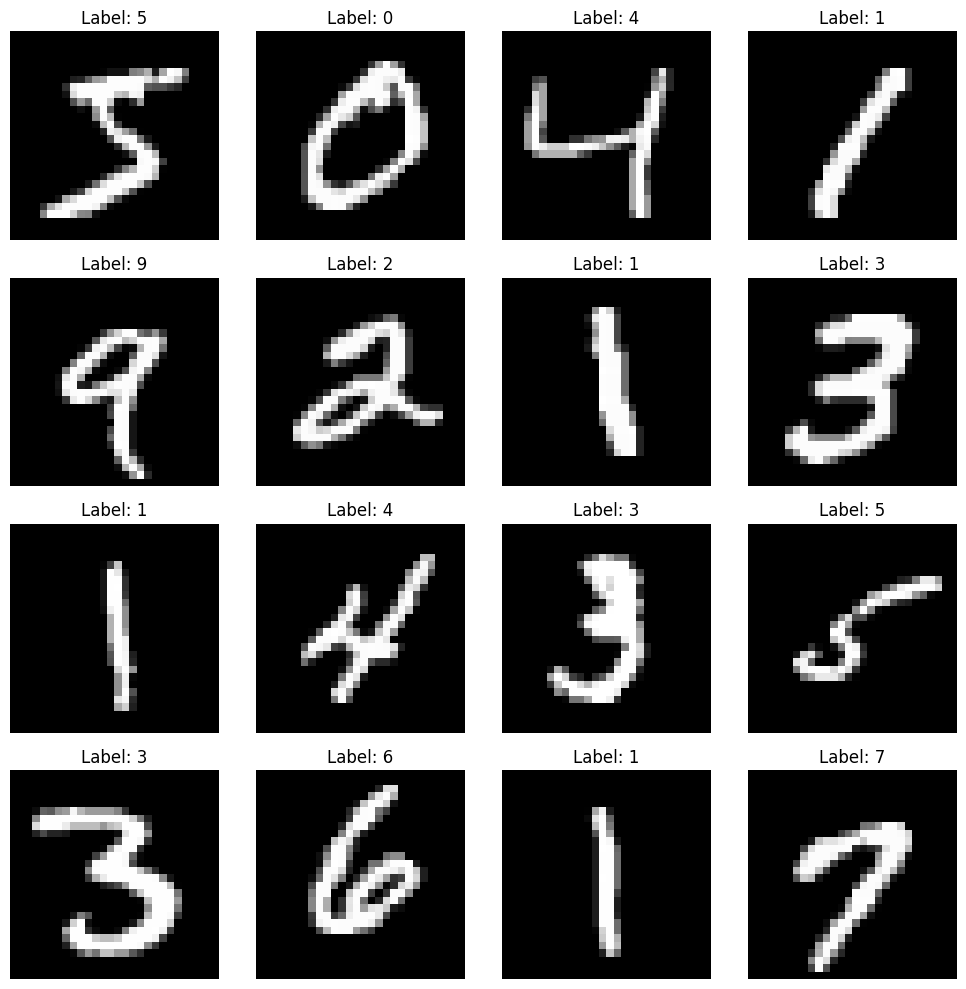

In [2]:
import matplotlib.pyplot as plt

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='', train=True, download=True)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # 4 rows, 4 columns

# Plot 16 images
for i in range(16):
    # Calculate the row and column index for the subplot
    row = i // 4  # Integer division to get the row index
    col = i % 4   # Modulo operation to get the column index

    # Get the image and label from the dataset
    image, label = train_dataset[i]

    # Display the image in the corresponding subplot
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f"Label: {label}")
    axes[row, col].axis('off')  # Turn off axis ticks and labels

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# DataLoader

In [23]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define CNN Model

In [4]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),

            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(64, 10),
        )
    def forward(self, x):
      x = self.features(x)
      x = self.classifier(x)

      return x

# Select model

In [5]:
lr = 0.001
epochs = 25

In [6]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop

In [24]:
for epoch in range(epochs):
  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)
    loss = criterion(outputs, batch_labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_epoch_loss += loss.item()

  # print avg loss in each epoch
  avg_loss = total_epoch_loss / len(train_loader)
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.01543411798775196
Epoch: 2, Loss: 0.02490762621164322
Epoch: 3, Loss: 0.08967547118663788
Epoch: 4, Loss: 0.0017298719612881541
Epoch: 5, Loss: 0.026032572612166405
Epoch: 6, Loss: 0.009524057619273663
Epoch: 7, Loss: 0.0014142511645331979
Epoch: 8, Loss: 0.02871653437614441
Epoch: 9, Loss: 0.0239133071154356
Epoch: 10, Loss: 0.030821610242128372
Epoch: 11, Loss: 0.0017436661291867495
Epoch: 12, Loss: 0.0029429569840431213
Epoch: 13, Loss: 0.004053896758705378
Epoch: 14, Loss: 0.09004772454500198
Epoch: 15, Loss: 0.001940079964697361
Epoch: 16, Loss: 0.004695637617260218
Epoch: 17, Loss: 0.0014519754331558943
Epoch: 18, Loss: 9.237364793079905e-06
Epoch: 19, Loss: 0.05148947611451149
Epoch: 20, Loss: 1.6605001292191446e-05
Epoch: 21, Loss: 0.00030951632652431726
Epoch: 22, Loss: 1.3255759768071584e-05
Epoch: 23, Loss: 0.3250576853752136
Epoch: 24, Loss: 7.773951801937073e-05
Epoch: 25, Loss: 0.00036866264417767525


# Evaluation

In [25]:
 # Set model to eval model
 model.eval()

CNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [26]:
# evaluation on test
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    # move to GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    y_pred = model(batch_features)
    _, predicted = torch.max(y_pred.data, 1)
    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy}')

Accuracy: 0.9916


In [27]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in train_loader:
    # move to GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    y_pred = model(batch_features)
    _, predicted = torch.max(y_pred.data, 1)
    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy}')

Accuracy: 0.9991333333333333
